In [16]:
import os
import numpy as np
os.chdir('/cfs/klemming/nobackup/l/linares/tcmm/single/')

In [17]:
!ls

GAFF_0.itp    bithio_1.top  index.ndx	vac-dist_0.xvg	 vac-value_2.xvg
GAFF_1.itp    bithio_2.top  md-nvt.mdp	vac-dist_1.xvg
GAFF_2.itp    bouh	    mdout.mdp	vac-dist_2.xvg
bithio.gro    error.log     output.log	vac-value_0.xvg
bithio_0.top  get-angle.x   run-md.sh	vac-value_1.xvg


In [18]:
with open("vac-value_2.xvg","r") as f:
    lines = f.readlines()

# cis/trans ratio 

In [19]:
P = []
M = []
T = []
for line in lines:
    if ("@" not in line) and ("#" not in line):
        
        X = float(line.split()[0])
        Y = float(line.split()[1])
        if Y < 90 and Y > 0:
            P.append(Y)
        elif Y < 0 and Y > -90:
            M.append(Y)
        elif Y >= 90 or Y <= 90:
            T.append(Y)
C = P + M  
plus = np.asarray(P)
minus = np.asarray(M)
cis = np.asarray(C)
trans = np.array(T)

In [20]:
c_t_ratio = round((len(cis)/len(trans)),2)

cis_p = round((len(cis)/(len(cis)+len(trans)))*100,2)

plus_p = round((len(plus)/(len(cis)+len(trans)))*100,2)

minus_p = round((len(minus)/(len(cis)+len(trans)))*100,2)

print(f"Percentage of plus = {plus_p} % and minus = {minus_p} %")

print(f"Percentage of cis = {cis_p} % and trans = {100-cis_p} %")

print(f"Cis/Trans Ratio = {c_t_ratio}")


Percentage of plus = 10.91 % and minus = 8.06 %
Percentage of cis = 18.97 % and trans = 81.03 %
Cis/Trans Ratio = 0.23


# Average solvation energy of cis and trans

In [21]:
os.chdir('/cfs/klemming/nobackup/l/linares/tcmm/box2/')

In [22]:
!pwd

/cfs/klemming/nobackup/l/linares/tcmm/box2


In [23]:
!ls

#bithio-box-md-nvt.edr.1#   #energy.xvg.5#		frame_10.gro
#bithio-box-md-nvt.edr.2#   #energy.xvg.6#		frame_2.gro
#bithio-box-md-nvt.edr.3#   #energy.xvg.7#		frame_3.gro
#bithio-box-md-nvt.log.1#   #wat-dist.xvg.1#		frame_4.gro
#bithio-box-md-nvt.log.2#   #wat-dist.xvg.2#		frame_5.gro
#bithio-box-md-nvt.log.3#   #wat-dist.xvg.3#		frame_6.gro
#bithio-box-md-nvt.tpr.1#   #wat-dist.xvg.4#		frame_7.gro
#bithio-box-md-nvt.tpr.10#  #wat-value.xvg.1#		frame_8.gro
#bithio-box-md-nvt.tpr.11#  #wat-value.xvg.2#		frame_9.gro
#bithio-box-md-nvt.tpr.12#  #wat-value.xvg.3#		frame_gro.xtc
#bithio-box-md-nvt.tpr.13#  #wat-value.xvg.4#		generate.py
#bithio-box-md-nvt.tpr.14#  NVT.mdp			get-data.x
#bithio-box-md-nvt.tpr.2#   amber14sb.ff		h2.xyz
#bithio-box-md-nvt.tpr.3#   bithio-box-md-nvt.cpt	index.ndx
#bithio-box-md-nvt.tpr.4#   bithio-box-md-nvt.edr	mdout.mdp
#bithio-box-md-nvt.tpr.5#   bithio-box-md-nvt.gro	output.log
#bithio-box-md-nvt.tpr.6#   bithio-box-md-nvt.log	pol.pot
#bithio-box-md-nvt.tpr.7

In [24]:
with open("wat-value.xvg","r") as f:
    lines_d = f.readlines()

with open("energy.xvg","r") as f:
    lines_e = f.readlines()


In [29]:
D = []
for line in lines_d:
    if ("@" not in line) and ("#" not in line):
        Y = float(line.split()[1])
        if Y < 90 and Y > -90:
            D.append("C")
        elif Y >= 90 or Y <= 90:
            D.append("T")

c_count =0
t_count = 0
for i in D:
    if i == "C":
        c_count += 1
    else:
        t_count += 1
cis_p = (c_count/(c_count+t_count))*100
trans_p = (t_count/(c_count+t_count))*100

LJ = []
Coul = []
for line in lines_e:
    if ("@" not in line) and ("#" not in line):
        t,coul,lj = line.split()
        LJ.append(float(lj))
        Coul.append(float(coul))  


cis_LJ = []
cis_coul = []
trans_LJ = []
trans_coul = []
for ndx,dih in enumerate(D):
    if dih=="C":
        cis_LJ.append(LJ[ndx])
        cis_coul.append(Coul[ndx])
    else:
        trans_LJ.append(LJ[ndx])
        trans_coul.append(Coul[ndx])

Cis_coul = np.asarray(cis_coul)
Trans_coul = np.asarray(trans_coul)
Cis_LJ = np.asarray(cis_LJ)
Trans_LJ = np.asarray(trans_LJ)

c_t_ratio = c_count/t_count

        
        
print(f"Percentage of cis = {round(cis_p,2)}% and trans = {round(100-cis_p,2)}%")
print(f"Cis/Trans Ratio = {round(c_t_ratio,2)}")
print(f"Average solvent coulombic interaction for cis = {round(Cis_coul.mean(),2)} +/- {round(Cis_coul.std(),2)} kJ/mol") 
print(f"Average solvent coulombic interaction for trans = {round(Trans_coul.mean(),2)} +/- {round(Trans_coul.std(),2)} kJ/mol ")  
print(f"Average solvent LJ interaction for cis = {round(Cis_LJ.mean(),2)} +/- {round(Cis_LJ.std(),2)} kJ/mol")        
print(f"Average solvent LJ interaction for trans = {round(Trans_LJ.mean(),2)} +/- {round(Trans_LJ.std(),2)} kJ/mol") 

Percentage of cis = 48.9% and trans = 51.1%
Cis/Trans Ratio = 0.96
Average solvent coulombic interaction for cis = -36.97 +/- 11.07 kJ/mol
Average solvent coulombic interaction for trans = -32.33 +/- 10.75 kJ/mol 
Average solvent LJ interaction for cis = -62.16 +/- 7.55 kJ/mol
Average solvent LJ interaction for trans = -62.32 +/- 6.61 kJ/mol


# Plotting stuff

In [26]:
with open("wat-value.xvg","r") as f:
    lines_d = f.readlines()

with open("energy.xvg","r") as f:
    lines_e = f.readlines()

In [27]:
import numpy as np
import matplotlib.pyplot as plt

t=[]
D_v=[]
D_w=[]
Coul=[]
LJ=[]

for line in lines:
    if ("@" not in line) and ("#" not in line):
        D_v.append(float(line.split()[1])) 
for line in lines_d:
    if ("@" not in line) and ("#" not in line):
        D_w.append(float(line.split()[1])) 
        t.append(float(line.split()[0]))
for line in lines_e:
    if ("@" not in line) and ("#" not in line):
        Coul.append(float(line.split()[1]))     
        LJ.append(float(line.split()[2])) 


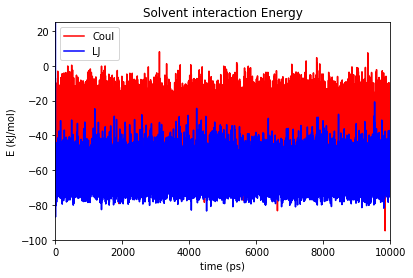

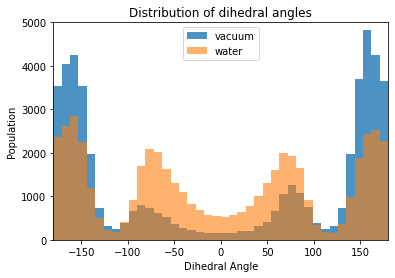

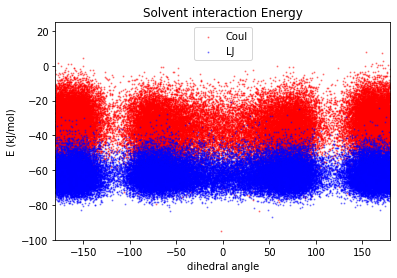

In [28]:

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(t,Coul, c='r', label='Coul')
ax1.plot(t,LJ, c='b',  label='LJ')
ax1.set(xlim=(0, 10000), ylim=(-100, 25))
ax1.set_title("Solvent interaction Energy")    
ax1.set_xlabel('time (ps)')
ax1.set_ylabel('E (kJ/mol)')
ax1.legend()
plt.show()



fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.hist(D_v, bins=40, label='vacuum', alpha=0.8)
ax1.hist(D_w, bins=40, label='water', alpha=0.6)
ax1.set(xlim=(-180, 180), ylim=(0, 5000))
ax1.set_title("Distribution of dihedral angles")    
ax1.set_xlabel('Dihedral Angle')
ax1.set_ylabel('Population')
ax1.legend()
plt.show()

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(D_w,Coul, c='r', marker='o',  s=1, alpha=0.4, label='Coul')
ax1.scatter(D_w,LJ, c='b', marker='o', s=1, alpha=0.4, label='LJ')
ax1.set(xlim=(-180, 180), ylim=(-100, 25))
ax1.set_title("Solvent interaction Energy")    
ax1.set_xlabel('dihedral angle')
ax1.set_ylabel('E (kJ/mol)')
ax1.legend()
plt.show()






# visualizing

In [14]:
import nglview as nv
import MDAnalysis as md
from nglview.datafiles import PDB, XTC


In [15]:
!ls

#bithio-box-md-nvt.edr.1#   #energy.xvg.5#		frame_10.gro
#bithio-box-md-nvt.edr.2#   #energy.xvg.6#		frame_2.gro
#bithio-box-md-nvt.edr.3#   #energy.xvg.7#		frame_3.gro
#bithio-box-md-nvt.log.1#   #wat-dist.xvg.1#		frame_4.gro
#bithio-box-md-nvt.log.2#   #wat-dist.xvg.2#		frame_5.gro
#bithio-box-md-nvt.log.3#   #wat-dist.xvg.3#		frame_6.gro
#bithio-box-md-nvt.tpr.1#   #wat-dist.xvg.4#		frame_7.gro
#bithio-box-md-nvt.tpr.10#  #wat-value.xvg.1#		frame_8.gro
#bithio-box-md-nvt.tpr.11#  #wat-value.xvg.2#		frame_9.gro
#bithio-box-md-nvt.tpr.12#  #wat-value.xvg.3#		frame_gro.xtc
#bithio-box-md-nvt.tpr.13#  #wat-value.xvg.4#		generate.py
#bithio-box-md-nvt.tpr.14#  NVT.mdp			get-data.x
#bithio-box-md-nvt.tpr.2#   amber14sb.ff		h2.xyz
#bithio-box-md-nvt.tpr.3#   bithio-box-md-nvt.cpt	index.ndx
#bithio-box-md-nvt.tpr.4#   bithio-box-md-nvt.edr	mdout.mdp
#bithio-box-md-nvt.tpr.5#   bithio-box-md-nvt.gro	output.log
#bithio-box-md-nvt.tpr.6#   bithio-box-md-nvt.log	pol.pot
#bithio-box-md-nvt.tpr.7

In [68]:
u = md.Universe('bithio-box-md-nvt.gro','bithio-box-md-nvt.xtc')

In [69]:
v= nv.show_mdanalysis(u)

In [70]:
v

NGLWidget(max_frame=50000)

In [57]:
os.chdir('/cfs/klemming/nobackup/l/linares/pdb')

In [58]:
!pwd

/cfs/klemming/nobackup/l/linares/pdb


In [51]:
%%writefile h2.xyz
2
title
H 0.0 0.0 0.4
H 0.0 0.0 -0.1

Overwriting h2.xyz


In [52]:
more h2.xyz

In [53]:
import nglview as nv
import MDAnalysis as md
u = md.Universe('h2.xyz')
z = nv.show_mdanalysis(u)
z

NGLWidget()

In [60]:
import nglview as nv
import MDAnalysis as md
from nglview.datafiles import PDB, XTC
u = md.Universe('5ulj.pdb')
z = nv.show_mdanalysis(u)
z

NGLWidget()

In [63]:
import nglview as nv
import MDAnalysis as md
from nglview.datafiles import PDB, XTC
u = mda.Universe('1ALA-250ns-2500frames.pdb', multiframe=True)
z = nv.show_mdanalysis(u)
z

NGLWidget(max_frame=2493)

In [64]:
import nglview as nv
import MDAnalysis as md
u = md.Universe('bdna-1kX5.pdb')

In [65]:
z = nv.show_mdanalysis(u)

In [66]:
z

NGLWidget()

# veloxchem

In [21]:
from mpi4py import MPI
import veloxchem as vlx

In [28]:
more bithio-box-md-nvt.gro

In [22]:
molecule = vlx.Molecule.read_str("""
    C  46.54   20.82   21.51  
    H  45.90   21.40   22.17  
    C  47.95   21.09   21.39  
    H  48.45   21.89   21.92  
    C  48.59   20.18   20.56  
    H  49.65   20.11   20.36  
    S  47.46   19.08   19.90 
    C  46.11   19.72   20.78 
    C  44.80   19.04   20.75  
    C  44.42   18.16   19.77  
    H  45.06   18.00   18.92  
    C  43.11   17.64   19.97 
    H  42.62   16.94   19.30 
    C  42.54   18.15   21.13 
    H  41.53   17.99   21.49 
    S  43.58   19.26   22.00""")

basis = vlx.MolecularBasis.read(molecule, "sto-3g")
ostream = vlx.OutputStream("/dev/null")
    
scf_drv = vlx.ScfRestrictedDriver(MPI.COMM_WORLD, ostream)
scf_drv.compute(molecule, basis)
    
if scf_drv.is_converged:
    print("Final energy:", scf_drv.get_scf_energy(), "Hartree")

Final energy: -1089.0406083772657 Hartree


In [23]:
molecule = vlx.Molecule.read_str("""
    C  46.54   20.82   21.51  
    H  45.90   21.40   22.17  
    C  47.95   21.09   21.39  
    H  48.45   21.89   21.92  
    C  48.59   20.18   20.56  
    H  49.65   20.11   20.36  
    S  47.46   19.08   19.90 
    C  46.11   19.72   20.78 
    C  44.80   19.04   20.75  
    C  44.42   18.16   19.77  
    H  45.06   18.00   18.92  
    C  43.11   17.64   19.97 
    H  42.62   16.94   19.30 
    C  42.54   18.15   21.13 
    H  41.53   17.99   21.49 
    S  43.58   19.26   21.00""")

basis = vlx.MolecularBasis.read(molecule, "sto-3g")
ostream = vlx.OutputStream("/dev/null")
    
scf_drv = vlx.ScfRestrictedDriver(MPI.COMM_WORLD, ostream)
scf_drv.compute(molecule, basis)
    
if scf_drv.is_converged:
    print("Final energy:", scf_drv.get_scf_energy(), "Hartree")

Final energy: -1088.3598401177585 Hartree
